In [1]:
import json
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud
import pickle
import re, string
import sys
import seaborn as sns
sns.set()
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
import pickle
from collections import Counter

In [5]:
import gensim
from gensim.models import Word2Vec

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from textblob import TextBlob    # import textblob packages, nlp
from textblob.sentiments import NaiveBayesAnalyzer



# import natural language toolkit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
#import pandas as pd
df2= pd.read_csv("/content/data5.csv")

In [14]:
df2.head()

,Unnamed: 0,review_cleaned_lemmatized,overall,sentiment
0,25928,great package good color really need let face ...,5,1
1,9371,pencil great would describe one word would pro...,5,1
2,6268,hold lot paper secures well make sturdy materi...,5,1
3,48623,order daughter start college fall love good si...,5,1
4,5437,ton postit note use every day make second cube...,5,1


In [49]:
newdf = df2


#Modelo Deep Learning

**Corpus y Word2Vec**

Generamos el Corpus y Word2Vec para poder pasar la representación de las palabras en vectores númericos a un modelo de Deep Learning

Se divide en sentencias para generar el corpus

In [50]:
# Convertimos review in un string único
newdf['review_cleaned_lemmatized']=newdf['review_cleaned_lemmatized'].astype(str)
raw_corpus = "".join(newdf['review_cleaned_lemmatized']+" ")
print("Raw Corpus contiene {0:,} characters".format(len(raw_corpus)))

tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
# we tokenize the raw string into raw sentences
raw_sentences = tokenizer.tokenize(raw_corpus)

Raw Corpus contiene 2,718,868 characters


In [51]:
def clean_and_split_str(string):
    strip_special_chars = re.compile("[^A-Za-z]+")
    string = re.sub(strip_special_chars, " ", string)
    
    return string.strip().lower().split()
     
# Se crea la lista de sentencias
sentences = []
for raw_sent in raw_sentences:
    if len(raw_sent) > 0:
        sentences.append(clean_and_split_str(raw_sent))



In [52]:
token_count = sum([len(sentence) for sentence in sentences])
print("Corpus dataset contiene {0:,} tokens".format(token_count))

Corpus dataset contiene 412,167 tokens


In [57]:
#Train de un Word2Vec modelo
import multiprocessing

#Dimensionalidad
num_features = 1000
 
#Minimo word count ramas arbol
min_word_count = 3
 
#Number de rammas 
num_workers = multiprocessing.cpu_count()
 
#Ventanas de contexto
context_size = 7
 
#Semilla
seed = 1

In [58]:
word2vec_model = Word2Vec(sentences = sentences,
    sg=1,
    seed=seed,
    workers=num_workers, 
    size=num_features, 
    min_count=min_word_count, 
    window=context_size)
     
print("El vocabulario esta realizado")
print("Word2Vec vocabulario longitud: ", len(word2vec_model.wv.index2word))

El vocabulario esta realizado
Word2Vec vocabulario longitud:  6670



Ahora hago el vector promedio de todas las palabras en una review en base al vocabulario

In [59]:
def averageVector(reviews, w2v):
    total = []
    lst = w2v.wv.index2word
    for review in reviews:
        avgVector = w2v.wv['i']*0
        count = 0
        empty = True
        for word in review:
            if word in lst:
                count += 1
                avgVector = np.add(avgVector, w2v.wv[word])
                empty = False
        if not empty:
            avgVector = np.divide(avgVector, count)
        total.append(avgVector)
    return total

In [60]:

data2 = df2['review_cleaned_lemmatized']
tokens2 = []
for review in data2:
    tokens2.append(review.split())

In [61]:

allVectors2 = averageVector(tokens2, word2vec_model)

In [62]:
len(allVectors2)

5000

**Train Test División**

Divido los datos en train y test. No los divido en validación porque tengo un data set de un tamaño no muy grande para poder procesarlo

In [130]:
y2 = df2["sentiment"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(pd.DataFrame(allVectors2), y2, test_size=0.2, random_state=42) #, stratify = y2

**LSTM**

In [131]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk

In [132]:
# Hyperparametros del modelo
vocab_size = 5000 
oov_tok = ''
embedding_dim = 100
max_length = 200 
padding_type='post'
trunc_type='post'
# tokenizador de las sentencias
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
X_train2 = [str (item) for item in X_train2]
tokenizer.fit_on_texts(X_train2)
word_index = tokenizer.word_index
# convertir en secuencias y padding
train_sequences = tokenizer.texts_to_sequences(X_train2)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
X_test2 = [str (item) for item in X_test2]
test_sequences = tokenizer.texts_to_sequences(X_test2)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

Iniciamos el modelo

In [159]:
#model initialization
seed = 12345
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)), #dropout= 0.2,recurrent_dropout = 0.2)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 200, 100)          500000    
                                                                 
 bidirectional_14 (Bidirecti  (None, 128)              84480     
 onal)                                                           
                                                                 
 dense_28 (Dense)            (None, 24)                3096      
                                                                 
 dense_29 (Dense)            (None, 1)                 25        
                                                                 
Total params: 587,601
Trainable params: 587,601
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo

In [160]:
num_epochs = 4
history = model.fit(train_padded, y_train2, 
                    epochs=num_epochs, verbose=1, 
                    validation_split=0.05, shuffle = True)

Epoch 1/4
30/30 [==============================] - 5s 62ms/step - loss: 0.6820 - accuracy: 0.5874 - val_loss: 0.6684 - val_accuracy: 0.6200
Epoch 2/4
30/30 [==============================] - 1s 21ms/step - loss: 0.6736 - accuracy: 0.5958 - val_loss: 0.6672 - val_accuracy: 0.6200
Epoch 3/4
30/30 [==============================] - 1s 21ms/step - loss: 0.6555 - accuracy: 0.5958 - val_loss: 0.6644 - val_accuracy: 0.6200
Epoch 4/4
30/30 [==============================] - 1s 21ms/step - loss: 0.4633 - accuracy: 0.8105 - val_loss: 0.6724 - val_accuracy: 0.6000


In [161]:
prediction = model.predict(test_padded)
# Si la etiqueta del sentimiento según la probabilidad is 1 si p>= 0.5 sino 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(y_test2,pred_labels))

Accuracy of prediction on test set :  0.503


Tiene una accuracy baja ya que no existe una palabras diferenciadoras del sentimiento

# **Modelo clásico**

**BOW-Bag of Words**

In [72]:
df3 = df2

In [73]:
# Se dividen los datos
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split(df3['review_cleaned_lemmatized'], df3['sentiment'], test_size = 0.2, random_state=1234)

In [74]:
# Convertimos texto en número con BOW 
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()


xtrain_bow = vectorizer.fit_transform(xtrain).toarray()
xtest_bow = vectorizer.transform(xtest).toarray()

Modelo GaussianNB

In [75]:
from sklearn.naive_bayes import GaussianNB

 
clf_bow = GaussianNB().fit(xtrain_bow, ytrain)  # entrenamiento 
prediction_bow = clf_bow.predict(xtest_bow)  # predictiones

In [76]:
#metricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

def metrics(prediction, actual): 
    print('Confusion_matrix \n', confusion_matrix(actual, prediction))
    print('\nAccuracy:', accuracy_score(actual, prediction))
    print('\nclassification_report\n')
    print(classification_report(actual, prediction))
    
    
metrics(prediction_bow, ytest)

Confusion_matrix 
 [[304 278]
 [165 253]]

Accuracy: 0.557

classification_report

              precision    recall  f1-score   support

           0       0.65      0.52      0.58       582
           1       0.48      0.61      0.53       418

    accuracy                           0.56      1000
   macro avg       0.56      0.56      0.56      1000
weighted avg       0.58      0.56      0.56      1000



**TF-IDF**

In [77]:
# Convertimos texto a numberos usando TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer  

tf_vectorizer = TfidfVectorizer()

 
xtrain_tf = tf_vectorizer.fit_transform(xtrain).toarray()
xtest_tf = tf_vectorizer.transform(xtest).toarray()

In [78]:
from sklearn.naive_bayes import GaussianNB

# Modelo GaussianNB
clf_tf = GaussianNB().fit(xtrain_tf, ytrain)
prediction_tf = clf_tf.predict(xtest_tf)

In [79]:
#Métricas del modelo
metrics(prediction_tf, ytest)

Confusion_matrix 
 [[313 269]
 [171 247]]

Accuracy: 0.56

classification_report

              precision    recall  f1-score   support

           0       0.65      0.54      0.59       582
           1       0.48      0.59      0.53       418

    accuracy                           0.56      1000
   macro avg       0.56      0.56      0.56      1000
weighted avg       0.58      0.56      0.56      1000



Estamos en un modelo muy desbalanceado que habría que balancearlo en la carga de los datos, ponderando más el peso de las opiniones negativas o con data augmentacion crean datos para que los pesos se igualasen.

En este caso el modelo clásico tiene menos overfittinng y nos da una precisión mayor ya que le afecta menos el que los datos esten desembalanceados que a Deep Learning

# METRICAS

**Métricas Modelo LSTM**

In [82]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [162]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test2,pred_labels)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test2,pred_labels)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test2,pred_labels)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test2,pred_labels)
print('F1 score: %f' % f1)
# confusion matrix
matrix = confusion_matrix(y_test2,pred_labels)
print(matrix)

Accuracy: 0.503000
Precision: 0.384416
Recall: 0.362745
F1 score: 0.373266
[[355 237]
 [260 148]]


In [128]:
import matplotlib.pyplot as pyplot

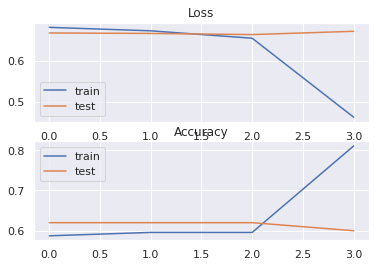

In [163]:

# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

Si se incluyen muchas épocas se produce un overfitting ya que el dataset esta muy desbalanceado y cuanto más datos se incluyan menos discriminante es. Con lo cual habría que balancear las muestras para que pudiese discrimar más este modelo.

**BOW-Bag of Words+GaussianNB**

In [84]:
metrics(prediction_bow, ytest)

Confusion_matrix 
 [[304 278]
 [165 253]]

Accuracy: 0.557

classification_report

              precision    recall  f1-score   support

           0       0.65      0.52      0.58       582
           1       0.48      0.61      0.53       418

    accuracy                           0.56      1000
   macro avg       0.56      0.56      0.56      1000
weighted avg       0.58      0.56      0.56      1000



**TF-IDF**

In [157]:
metrics(prediction_tf, ytest)

Confusion_matrix 
 [[313 269]
 [171 247]]

Accuracy: 0.56

classification_report

              precision    recall  f1-score   support

           0       0.65      0.54      0.59       582
           1       0.48      0.59      0.53       418

    accuracy                           0.56      1000
   macro avg       0.56      0.56      0.56      1000
weighted avg       0.58      0.56      0.56      1000



Respecto a los modelos clásicos se ven menos afectados que los modelos de deep learning y da una accuracy mayor.


**Conclusión final:**

Para mejorar el modelo habría que balancear el modelo después de la carga de datos dando más peso a las opiniones negativas que a las positivas o mediante data augmentation, como ténncia de resampling, para crear datos nuevos en base a las opiniones negativas que igualen los pesos.
En caso de data sets desbalanceados Deep Learning es más sensible que los modelos de ML clásicos como se ha visto en las métricas.

Por lo tanto seleccionaria el modelo de TF-IDF porque tiene una precisión parecida a la de BOG, pero tiene unas decimas superiores en accuracy. También se debería de probar con otros modelos, suponiendo que no es una distribucción Gaussiana ya que definirían mejor el modelo de datos y nos daría una mejor accuracy.